In [52]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 200

In [80]:
# from sklearn import datasets
# iris = datasets.load_iris()
# iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                      columns= iris['feature_names'] + ['target'])
needed_cols = ['VEHICLE_ODOMETER', 'COMP_COMPANY_CODE', 'FILE_AMT', 'COND_DRIVEABLE_CODE', 'LOSS_DATETIME', 'VEH_YEAR_CODE', 'VEH_MAKE_CODE', 'VEH_MODEL_DESC', 'VEH_STYLE_CODE']
df = pd.read_csv('ces_EE1943.csv', usecols=needed_cols)
df.shape

(75284, 9)

In [81]:
df.dropna(axis=0, inplace=True)
for i in needed_cols:
    if df[i].dtype == 'object':
        df = df[df[i] != 'U']
df.shape

(71555, 9)

In [82]:
df.head()

,COMP_COMPANY_CODE,COND_DRIVEABLE_CODE,FILE_AMT,LOSS_DATETIME,VEHICLE_ODOMETER,VEH_MAKE_CODE,VEH_MODEL_DESC,VEH_STYLE_CODE,VEH_YEAR_CODE
0,AL,Y,963.67,23-DEC-14,7901.0,BMW,320XI AWD,4D SED,2014
1,AL,Y,370.29,26-DEC-14,14936.0,BMW,320I,4D SED,2013
2,US,Y,2269.92,01-JAN-15,5289.0,BMW,320XI AWD,4D SED,2014
3,FA,Y,1874.78,07-DEC-14,34535.0,BMW,328I,4D SED,2013
4,AL,Y,117.58,11-DEC-14,0.0,BMW,320XI AWD,4D SED,2014


In [14]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

# Simple plots

### Example 1

<IPython.core.display.Javascript object>


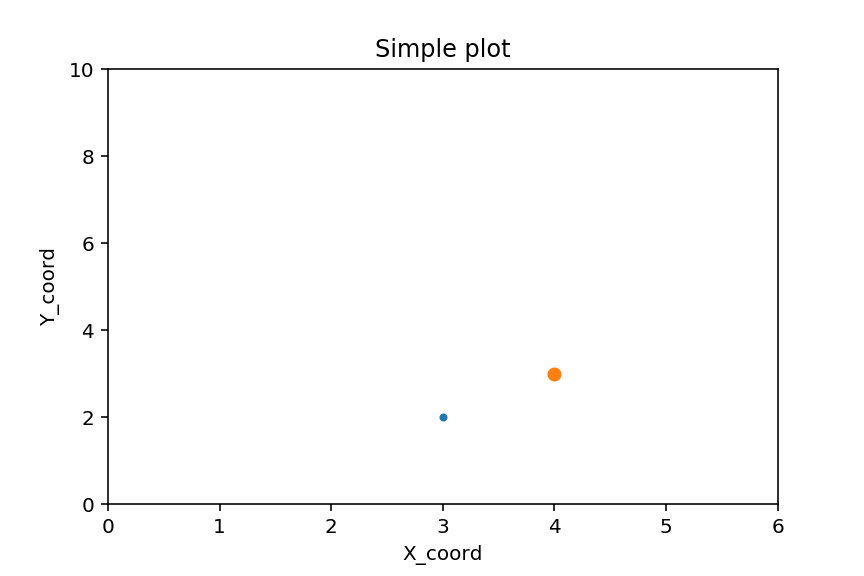

In [15]:
plt.plot(3, 2, '.')

In [16]:
plt.plot(4, 3, 'o')

In [21]:
# get the current axes
ax = plt.gca()

# # Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

[0, 6, 0, 10]

In [20]:
plt.xlabel('X_coord')
plt.ylabel('Y_coord')
plt.title('Simple plot')

### Example 2

<IPython.core.display.Javascript object>


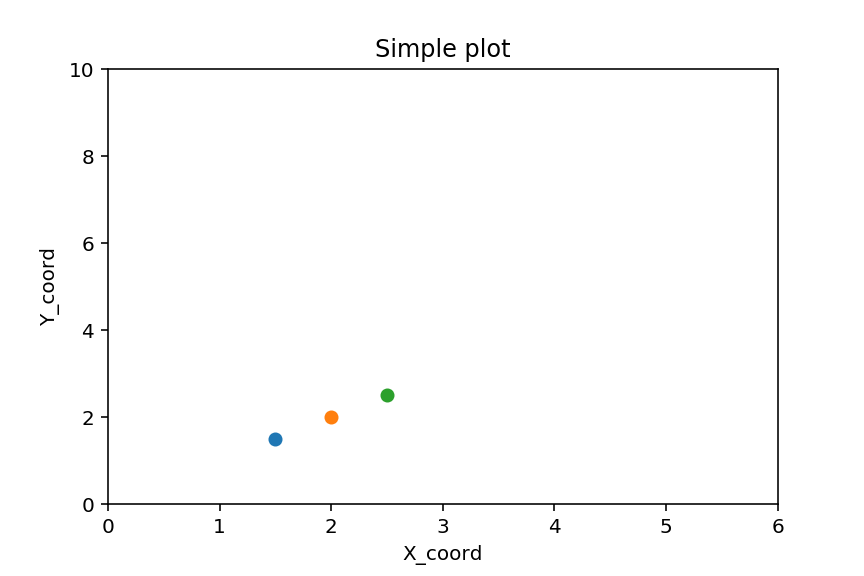

In [19]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

# Scatterplot

### Example 3

<IPython.core.display.Javascript object>


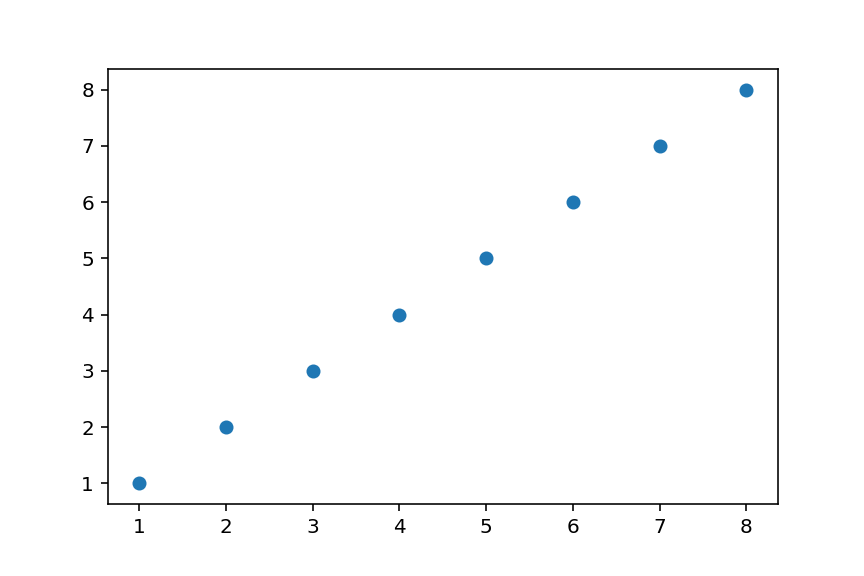

In [28]:
x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x, y) 

### Example 4

In [29]:
# Add Colors
colors = ['green']*(len(x)-1)
colors.append('red')
colors

['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']

<IPython.core.display.Javascript object>


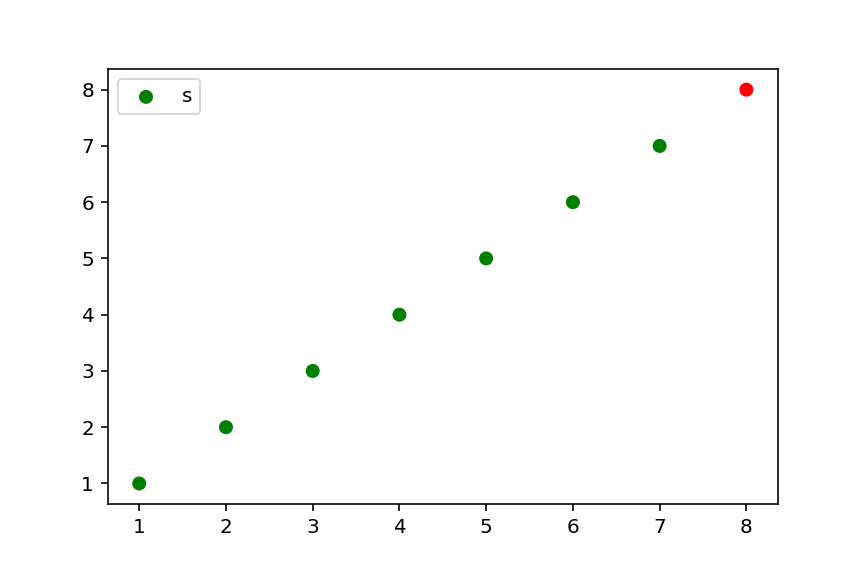

In [30]:
plt.figure()
plt.scatter(x, y, c=colors)
plt.legend('s')

### Example 5

<IPython.core.display.Javascript object>


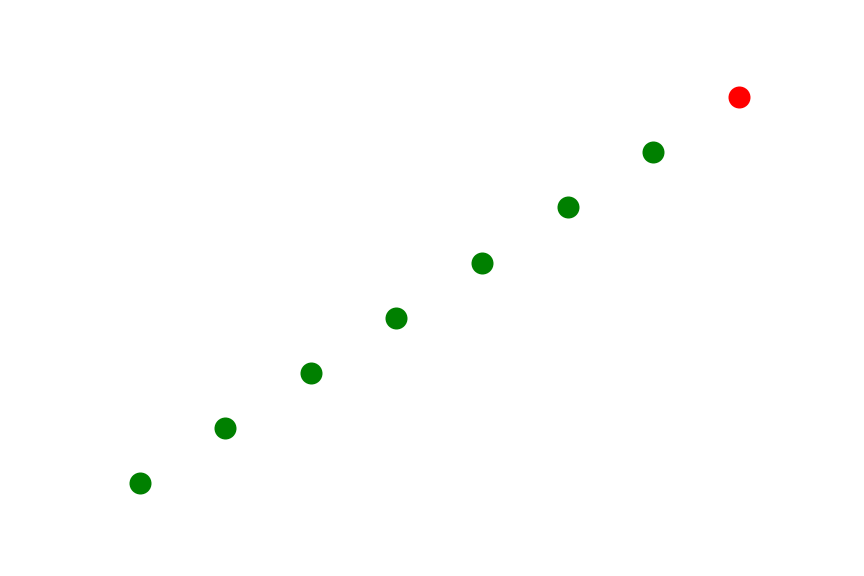

In [33]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:-1], y[:-1], s=100, c='green', label='Type 1')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[-1:], y[-1:], s=100, c='red', label='Type 2')

# Legends
plt.legend()
# plt.legend(loc=4, frameon=False, title='Legend')

<IPython.core.display.Javascript object>


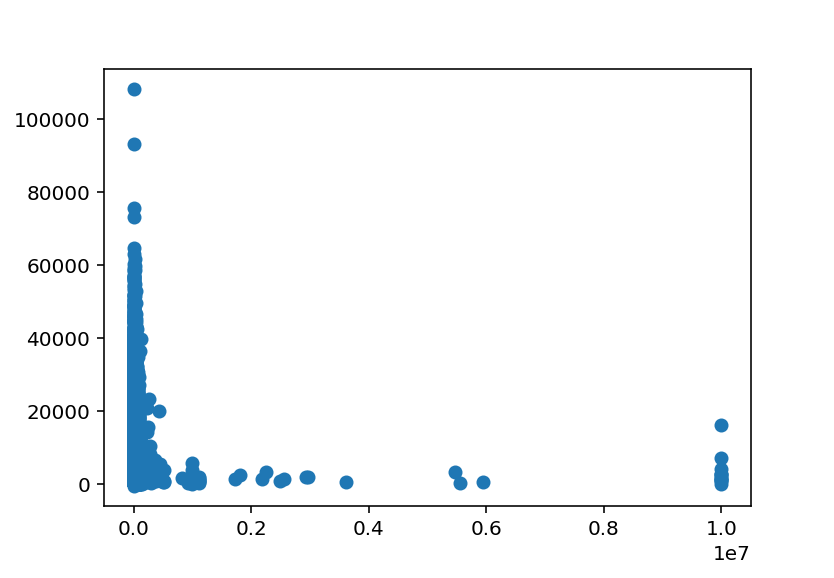

In [92]:
plt.figure()
plt.ticklabel_format(useOffset=False)
y = df['FILE_AMT']
x = df['VEHICLE_ODOMETER']
plt.scatter(x, y) 

In [89]:

# ax = plt.gca()
# ax.get_xaxis().get_major_formatter().set_useOffset(False)
# plt.xticks()

# Line Plots

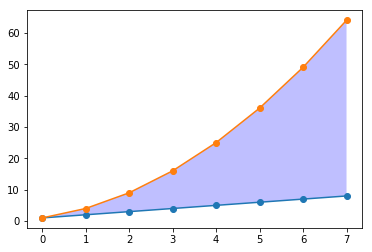

In [54]:
linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')
# plt.plot([22,44,55], '--r')
# plt.scatter(x, y, c=colors)

# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

# Let's try working with dates!

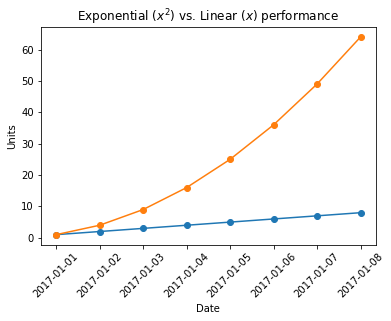

In [61]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')


# x = plt.gca().xaxis

# # rotate the tick labels for the x axis
# for item in x.get_ticklabels():
#     item.set_rotation(45)
    
# you can add mathematical expressions in any text element
# ax = plt.gca()
# ax.set_xlabel('Date')
# ax.set_ylabel('Units')
# # ax.set_title('Exponential vs. Linear performance')
# ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

# plt.xlabel('Date')
# plt.ylabel('Units')
# # plt.title('Exponential vs. Linear performance')
# plt.title("Exponential ($x^2$) vs. Linear ($x$) performance")

# Bar Chart

<Container object of 8 artists>

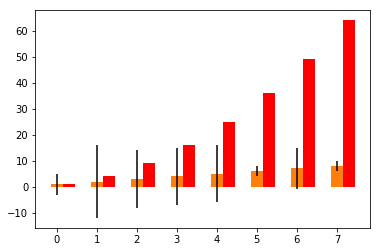

In [64]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)


new_xvals = []
# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)
plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')


from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))] 
# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<Container object of 8 artists>

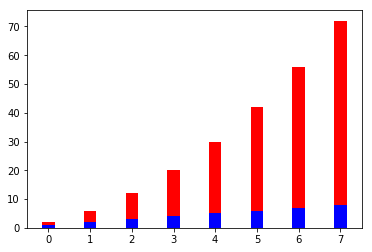

In [65]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

<Container object of 8 artists>

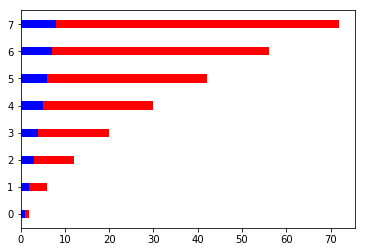

In [66]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

# Subplots

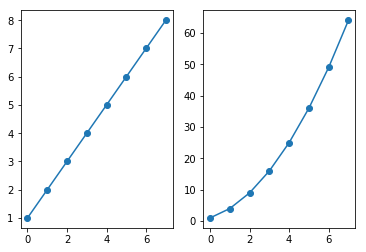

In [68]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')


exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [70]:
'Any problem?'

'Any problem?'

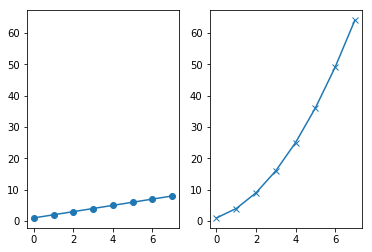

In [72]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(122, sharey=ax1)
plt.plot(exponential_data, '-x')

True

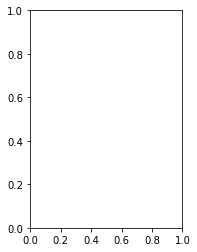

In [74]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

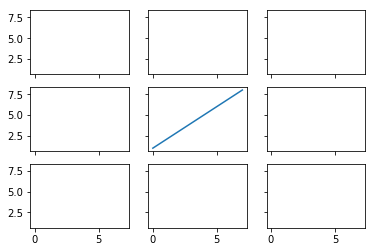

In [83]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')
# ax.tick_params() = [1,2,4,5,6]
# plt.xticks([1,2,4,5,6])

# Histogram